In [1]:
import pandas as pd
import os
import requests
import geopandas as gpd
from shapely.geometry import Point
import matplotlib.pyplot as plt
import contextily as ctx

/Users/liuzhengyong/Library/Python/3.9/lib/python/site-packages/urllib3/__init__.py:34: NotOpenSSLWarning: urllib3 v2 only supports OpenSSL 1.1.1+, currently the 'ssl' module is compiled with 'LibreSSL 2.8.3'. See: https://github.com/urllib3/urllib3/issues/3020
  warnings.warn(


In [2]:
def cache_data(source_url, dest_dir):
    # 确保目标目录存在
    if not os.path.exists(dest_dir):
        os.makedirs(dest_dir)

    # 解析文件名
    filename = source_url.split('/')[-1].split('?')[0]  # 假设URL以文件名结尾
    file_path = os.path.join(dest_dir, filename)

    # 如果文件不存在，则下载
    if not os.path.isfile(file_path):
        response = requests.get(source_url)
        if response.status_code == 200:
            with open(file_path, 'wb') as file:
                file.write(response.content)
        else:
            raise Exception(f"Failed to download {source_url}")

    return file_path

In [3]:
# 定义GitHub上CSV文件的原始URL
github_url = 'https://raw.githubusercontent.com/ZhengyongLiu/QM_GroupAssignment_Data/main/Clean_Data/Cleaned_Data_Done.csv'

# 使用pd.read_csv读取CSV数据并将其存储到DataFrame中
df = pd.read_csv(github_url)
# selected_columns = df[['latitude', 'longitude']]
# # 将CSV数据转换为GeoDataFrame
geometry = [Point(xy) for xy in zip(df['longitude'], df['latitude'])]
geo_df = gpd.GeoDataFrame(df, geometry=geometry)

In [4]:
# 读取伦敦的Shapefile
ddir  = os.path.join('Data') # destination directory
spath = 'https://github.com/jreades/fsds/blob/master/data/src/' # source path

london_map = gpd.read_file( cache_data(spath+'Boroughs.gpkg?raw=true', ddir) )

geo_df = gpd.GeoDataFrame(df, geometry=geometry)
geo_df.crs = 'EPSG:4326'  # 设置为WGS 84坐标系

# 确认伦敦shapefile的CRS
london_map_crs = london_map.crs

# 将点数据集转换为shapefile的CRS
geo_df = geo_df.to_crs(london_map_crs)

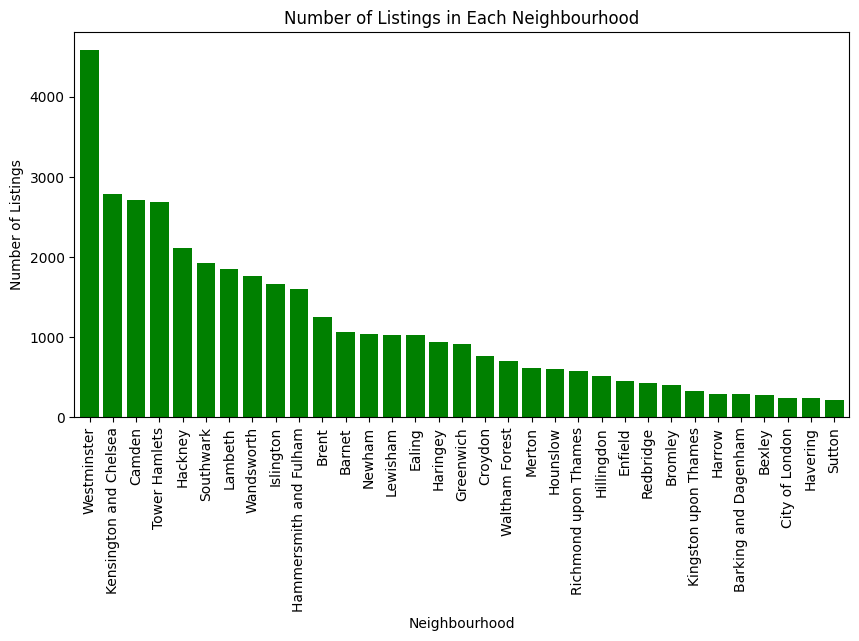

In [5]:
# Plot Bar Chart
neighbourhood_counts = df['neighbourhood'].value_counts()

plt.figure(figsize=(10, 5))
# 绘制柱状图
neighbourhood_counts.plot(kind='bar', color='g', width=0.8)

# 设置图表的标题和轴标签
plt.title('Number of Listings in Each Neighbourhood')
plt.xlabel('Neighbourhood')
plt.ylabel('Number of Listings')

# 显示图表
plt.show()

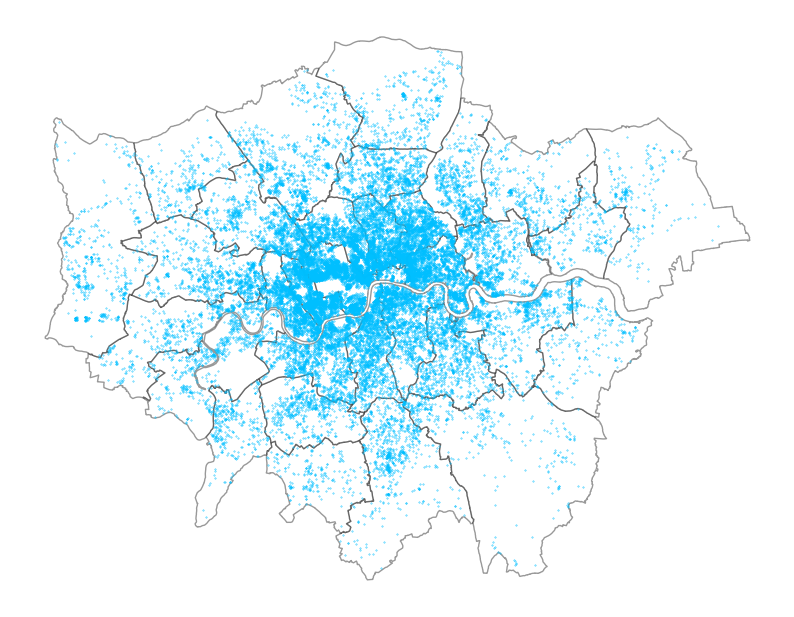

In [6]:
# Plot Map
# 假设geo_df和london_map已经设置了正确的CRS为EPSG:4326

# 绘制地图
fig, ax = plt.subplots(figsize=(10, 10))

# 将数据转换为Web Mercator
london_map = london_map.to_crs(epsg=3857)
geo_df = geo_df.to_crs(epsg=3857)

# 绘制shapefile和点
london_map.plot(ax=ax, color='white', edgecolor='black', alpha=0.4)
geo_df.plot(ax=ax, markersize=0.1, color='deepskyblue', marker='o')

# 添加OpenStreetMap底图
# ctx.add_basemap(ax, source=ctx.providers.OpenStreetMap.Mapnik)

# 移除坐标轴
ax.set_axis_off()

# 展示地图
plt.show()


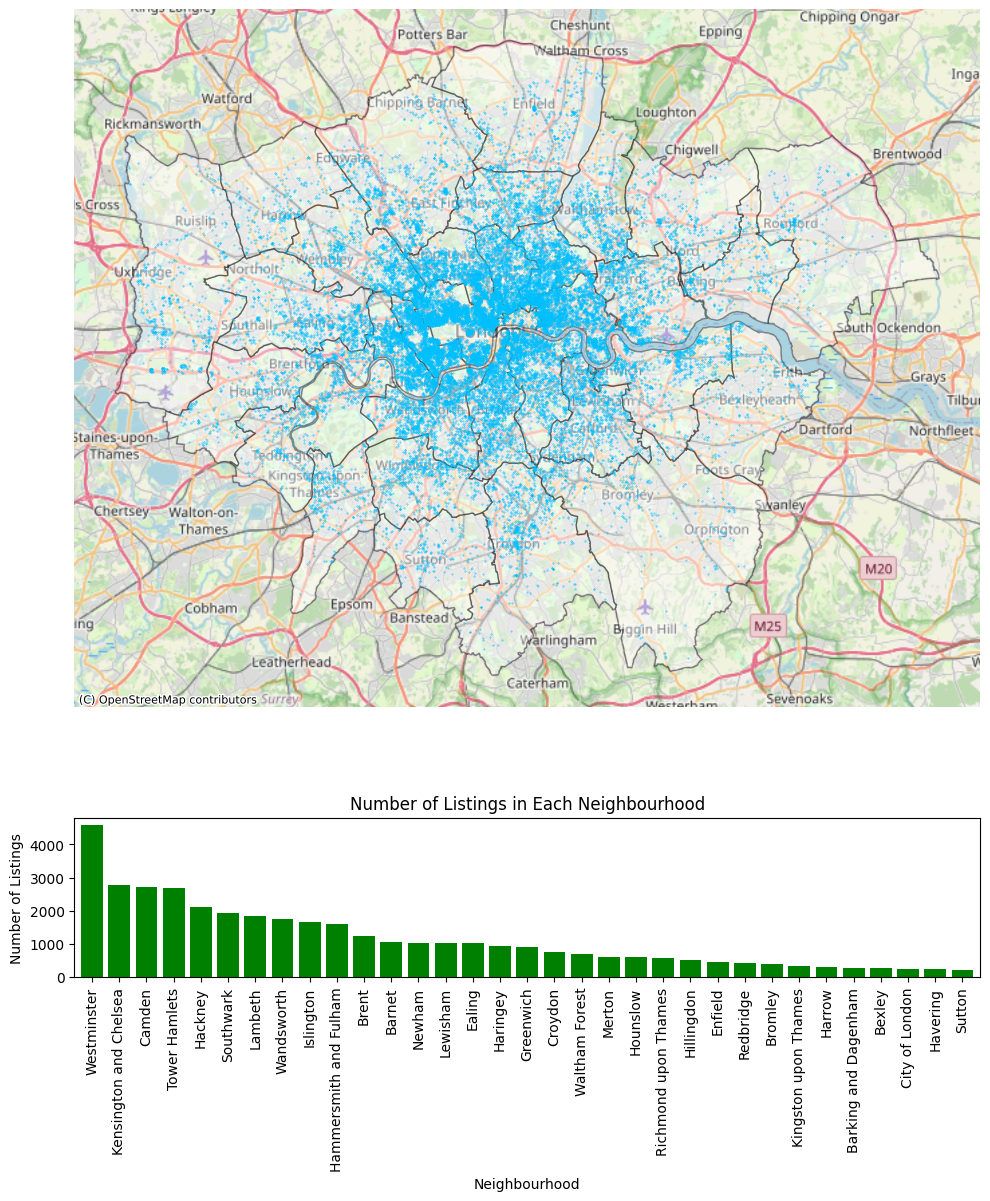

In [7]:
# 创建一个图形和两个子图，布局为2行1列
# 调整整个图形的大小，特别是高度
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(10, 15), gridspec_kw={'height_ratios': [8, 1]})

# 调整子图之间的垂直空间
plt.subplots_adjust(hspace=0)

# 第一个子图：地图
# 假设geo_df和london_map已经设置了正确的CRS为EPSG:4326

# 将数据转换为Web Mercator
london_map = london_map.to_crs(epsg=3857)
geo_df = geo_df.to_crs(epsg=3857)

# 绘制shapefile和点
london_map.plot(ax=ax1, color='white', edgecolor='black', alpha=0.4)
geo_df.plot(ax=ax1, markersize=0.1, color='deepskyblue', marker='o')

# 添加OpenStreetMap底图
ctx.add_basemap(ax1, source=ctx.providers.OpenStreetMap.Mapnik)

# 移除坐标轴
ax1.set_axis_off()

# 第二个子图：柱状图
neighbourhood_counts = df['neighbourhood'].value_counts()
neighbourhood_counts.plot(kind='bar', color='g', width=0.8, ax=ax2)
ax2.set_title('Number of Listings in Each Neighbourhood')
ax2.set_xlabel('Neighbourhood')
ax2.set_ylabel('Number of Listings')

# 展示图表
plt.tight_layout()
plt.show()